<a href="https://colab.research.google.com/github/Last-Vega/Klis_Workshop_MachineLearning/blob/master/ML5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip cat_dog_images.zip

Archive:  cat_dog_images.zip
   creating: cat_dog_images/
  inflating: cat_dog_images/.DS_Store  
  inflating: __MACOSX/cat_dog_images/._.DS_Store  
   creating: cat_dog_images/0/
   creating: cat_dog_images/1/
  inflating: cat_dog_images/0/00132.jpg  
  inflating: cat_dog_images/0/02057.jpg  
  inflating: cat_dog_images/0/00898.jpg  
  inflating: cat_dog_images/0/01210.jpg  
  inflating: cat_dog_images/0/01576.jpg  
  inflating: cat_dog_images/0/01562.jpg  
  inflating: cat_dog_images/0/01204.jpg  
  inflating: cat_dog_images/0/01589.jpg  
  inflating: cat_dog_images/0/00683.jpg  
  inflating: cat_dog_images/0/00873.jpg  
  inflating: cat_dog_images/0/01748.jpg  
  inflating: cat_dog_images/0/01990.jpg  
  inflating: cat_dog_images/0/00456.jpg  
  inflating: cat_dog_images/0/00324.jpg  
  inflating: cat_dog_images/0/00442.jpg  
  inflating: cat_dog_images/0/01012.jpg  
  inflating: cat_dog_images/0/00318.jpg  
  inflating: cat_dog_images/0/01006.jpg  
  inflating: cat_dog_images/0/019

In [ ]:
import torchvision # PyTorchの中でも特に画像データの扱いに特化したパッケージ
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# 画像に対して実行する前処理を定義するクラス
class ImageTransform():
    def __init__(self):
        self.data_transform = transforms.Compose([
            transforms.Resize((224, 224)), # 画像のサイズを揃える必要があるので224 x 224に統一
            transforms.ToTensor()
        ])
    
    def __call__(self, img):
        return self.data_transform(img)

# torchvision.datasets.ImageFolderは
# あるフォルダ中に含まれるフォルダ名をラベルとして，その中に含まれる画像はそのラベルが付与されていると解釈し，
# 画像データを読み込む
image_dir = "/content/cat_dog_images" # アップロードしたzipファイルがcat_dog_imagesというフォルダに展開されるはず
dataset = torchvision.datasets.ImageFolder(image_dir, transform=ImageTransform())
dataset

Dataset ImageFolder
    Number of datapoints: 2107
    Root location: /content/cat_dog_images
    StandardTransform
Transform: <__main__.ImageTransform object at 0x7f4ab05983c8>

In [ ]:
from torch.utils.data import DataLoader, random_split

train_size = 167 # 先頭の167件を訓練データとして用いることにする
batch_size = 32 # ミニバッチのサイズを設定，増やしても減らしても良い

# 訓練データとテストデータに分割
train_dataset, test_dataset = random_split(dataset, [train_size, len(dataset)-train_size])

# 訓練データを読み込むためのデータローダーを準備．shuffle=Trueはミニバッチを作る際に，画像の順序をランダムにするオプション．
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

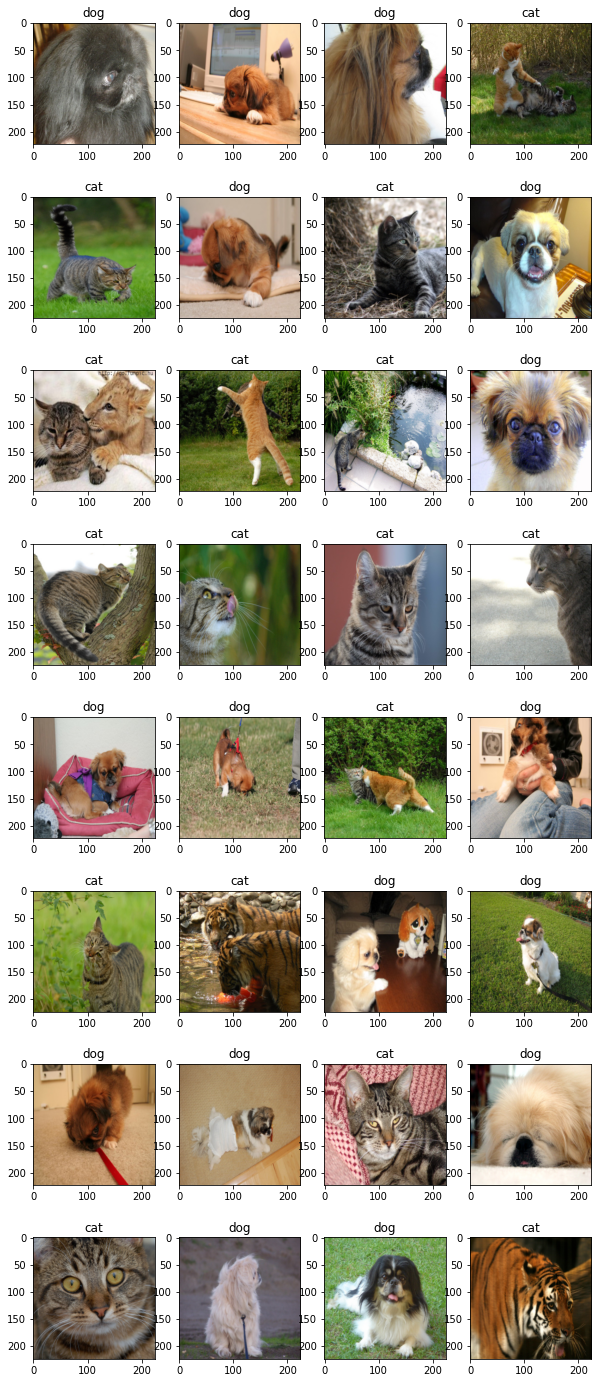

In [ ]:
# 1つ目のバッチを取り出して，1つ目のバッチの画像とラベルだけ表示させてみる
# `DataLoader`への引数が`shuffle=True`となっている場合，画像の順序がランダムになっているため，
# 実行するごとに読み込まれる画像が異なるはずである．

%matplotlib inline
# 上の行はmatplotlibというPythonパッケージをセル間に表示させるための設定
import matplotlib.pyplot as plt # matplotlibというPythonパッケージからpltモジュールをimportする
from PIL import Image # PILパッケージからImageモジュールをimportする
import numpy as np # numpyパッケージをimportする
 
fig = plt.figure(figsize=(10, 25)) # 10 x 25の画像表示域を確保

# データローダーはミニバッチ勾配降下法のために，`batch_size`で指定した数ごとにデータをわけて読み込んでくれる．
for images, labels in train_dataloader:
    # 得られたミニバッチ中の各画像を表示してみる
    for i in range(batch_size):
      im = images[i].permute(1, 2, 0) # 表示用の変換（以下で補足）
      ax = fig.add_subplot(8, 4, i+1) # 8行4列のうち，i+1番目のマスを選択
      label_name = "dog" if labels[i] == 1 else "cat" # ラベルが1なら犬，そうでなければ（ラベルが0なら）猫
      ax.set_title(label_name) # マスにタイトルを設定
      ax.imshow(im) # 画像を表示
    break # ミニバッチは複数あるが，1個読み込んだら終わるようにbreakをここに入れている